In [1]:
#!jt -r
!jt -t monokai -f roboto -fs 12 -cellw 100% -T -N -kl
# list available themes
# onedork | grade3 | oceans16 | chesterish | monokai | solarizedl | solarizedd
#!jt -t grade3
# !jt -t monokai # nero top
# !jt -t solarizedl # bianco bellino
#!jt -t monokai

In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
!pip install yfinance

# Equally weighted oppure value weighted

In questo foglio esaminiamo i dati su ETF e poi su S&P500 su tre portafogli: value weighted, equally weighted con ribilanciamento annuale senza tasse, euqally weighted senza ribilanciamento. L'investimento è a N anni (solitamente 10), quindi verrà un istogramma dei rendimenti nel tempo a N anni. Verrà mostrato come un grafgico, sarà quindi il grafico del rendimento nel tempo.

Per calcolare i pesi prendo i pesi attuali (ETF World o S&P500) e poi li retrocedo al momento in cui inizia l'investimento. Chiaramente l'investimento non avrà necessariamente tutti gli asset, ma solo quelli disponibili in partenza. Attenzione che va fatto un ffill per evitare danni in caso di mancanza.

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn

C:\Users\Paolo\AppData\Local\Temp\ipykernel_18520\2243541606.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


# RINGRAZIAMO GUIDO NANDAYDEV per i files!!!!


In [2]:
import json
import requests
import urllib.parse
response = requests.get("https://api.github.com/repos/NandayDev/MSCI-Historical-Data/git/trees/main?recursive=1")
json_response = json.loads(response.text)
dfs=[]
for branch in json_response["tree"]:
  if ("countries" in branch["path"] or "indexes" in branch["path"] ) and "csv" in branch["path"]:
      filename = "https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/" + urllib.parse.quote(branch["path"])
      print(filename)
      dfs.append(pd.read_csv(filename,index_col=0,skiprows=1,header=0,names=["Date",filename[filename.rfind("/")+1:-4].replace("%20"," ")]))
for branch in json_response["tree"]:
  if ("curvo" in branch["path"] ) and "csv" in branch["path"]: # in modo da averli DOPO e quindi in caso di duplicati scartare QUESTI e non i precedenti
      filename = "https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/" + urllib.parse.quote(branch["path"])
      print(filename)
      dfs.append(pd.read_csv(filename,index_col=0,skiprows=1,header=0,names=["Date",filename[filename.rfind("/")+1:-4].replace("%20"," ")]))

https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20ARGENTINA.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20AUSTRALIA.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20AUSTRIA.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20BAHRAIN%20DOMESTIC.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20BAHRAIN.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20BANGLADESH.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20BELGIUM.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20BOSNIA%20AND%20HERZEGOVINA.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20BOTSWANA.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/c

https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20OMAN.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20OVERSEAS%20CHINA%20%28SG%29.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20OVERSEAS%20CHINA%20%28US%29.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20OVERSEAS%20CHINA.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20PAKISTAN%20GROWTH.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20PAKISTAN%20VALUE.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20PAKISTAN.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20PANAMA.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/countries/MSCI%20PERU.csv
https://raw.githubusercontent.com/NandayDev/MSC

https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20ACWI%20VOTING%20RIGHTS-ADJUSTED.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20ACWI%20WITH%20BRAZIL%20%2B%20INDIA%20%2B%20RUSSIA%20DR.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20ACWI%20WITH%20BRAZIL%20ADR.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20ACWI%20WITH%20CHINA%20ALL%20SHARES.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20ACWI%20WITH%20PARTIAL%20A%20SHARES.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20ACWI%20WITH%20USA%20GROSS.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20ACWI%20ex%20ANDEAN.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20ACWI%20ex%20AUS

https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20EAFE%20ex%20UK.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20EAFE.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20EASEA%20INDEX%20%28EAFE%20ex%20JAPAN%29.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20EFM%20%28EMERGING%20%2B%20FRONTIER%20MARKETS%29.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20EFM%20AFRICA%20ex%20ZA.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20EFM%20AFRICA.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20EFM%20ASEAN.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20EFM%20ASIA.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/ind

https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20GCC%20COUNTRIES%20DOMESTIC%20ex%20SA.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20GCC%20COUNTRIES%20DOMESTIC.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20GCC%20COUNTRIES%20ex%20SA.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20GCC%20COUNTRIES.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20GOLDEN%20DRAGON%20%28A%20ONSHORE%20exB%29%20IMI.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20GOLDEN%20DRAGON%20%28A%20ONSHORE%20exB%29%20LARGE%20CAP.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20GOLDEN%20DRAGON%20%28A%20ONSHORE%20exB%29%20MID%20CAP.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/i

https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20ZHONG%20HUA%20ex%20B%20%2B%20OVERSEAS%20CHINA.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20ZHONG%20HUA%20ex%20B.csv
https://raw.githubusercontent.com/NandayDev/MSCI-Historical-Data/main/indexes_gross/MSCI%20ZHONG%20HUA.csv


In [3]:
dati=pd.concat(dfs,axis=1).sort_values(by="Date")
dati=dati.iloc[:,~dati.columns.duplicated()] # elimino i duplicati

In [4]:
dati.info()

<class 'pandas.core.frame.DataFrame'>
Index: 642 entries, 1970-01 to 2023-06
Columns: 355 entries, MSCI ARGENTINA to MSCI ZHONG HUA
dtypes: float64(344), object(11)
memory usage: 1.7+ MB


In [5]:
# ATTENZIONE SISTEMIAMO RUSSIA VALUE e RUSSIA GROWTH
dati.loc["2022-03":,"MSCI RUSSIA VALUE"].fillna(0.001, inplace=True)
dati.loc["2022-03":,"MSCI RUSSIA GROWTH"].fillna(0.001, inplace=True)

In [6]:
#dati.to_csv("datiTutti.csv")

In [7]:
dati.fillna(method="ffill",limit=6,inplace=True)

In [8]:
print(list(dati.columns),end=", ")
# NB: gli indici sonon TUTTI comprensivi di dividendi

['MSCI ARGENTINA', 'MSCI AUSTRALIA', 'MSCI AUSTRIA', 'MSCI BAHRAIN DOMESTIC', 'MSCI BAHRAIN', 'MSCI BANGLADESH', 'MSCI BELGIUM', 'MSCI BOSNIA AND HERZEGOVINA', 'MSCI BOTSWANA', 'MSCI BRAZIL ADR', 'MSCI BRAZIL', 'MSCI BULGARIA', 'MSCI CANADA', 'MSCI CHILE', 'MSCI CHINA 50', 'MSCI CHINA A 50 CONNECT RMB', 'MSCI CHINA A 50 CONNECT', 'MSCI CHINA A 50', 'MSCI CHINA A INCLUSION RMB', 'MSCI CHINA A INCLUSION', 'MSCI CHINA A INTERNATIONAL', 'MSCI CHINA A ONSHORE %2B B %2B H', 'MSCI CHINA A ONSHORE %2B B', 'MSCI CHINA A ONSHORE %2B H', 'MSCI CHINA A ONSHORE', 'MSCI CHINA A RMB', 'MSCI CHINA A', 'MSCI CHINA ALL SHARES', 'MSCI CHINA B', 'MSCI CHINA FREE %2B OVERSEAS CHINA', 'MSCI CHINA H', 'MSCI CHINA P CHIP', 'MSCI CHINA RED CHIP %2B P CHIP', 'MSCI CHINA RED CHIP', 'MSCI CHINA WITH PARTIAL A SHARES', 'MSCI CHINA', 'MSCI COLOMBIA', 'MSCI CROATIA', 'MSCI CZECH REPUBLIC', 'MSCI DENMARK', 'MSCI EGYPT', 'MSCI ESTONIA', 'MSCI FINLAND', 'MSCI FRANCE', 'MSCI GERMANY', 'MSCI GHANA', 'MSCI GREECE', 'MSCI 

In [9]:
# dati.drop(["2023-07","2023-06","2023-05"],axis=0,inplace=True)

In [11]:
etf=["MSCI RUSSIA VALUE","MSCI USA", "MSCI JAPAN", "MSCI UNITED KINGDOM", "MSCI CHINA", "MSCI FRANCE", "MSCI CANADA", "MSCI SWITZERLAND", "MSCI GERMANY", 
     "MSCI AUSTRALIA", "MSCI INDIA", "MSCI TAIWAN", "MSCI KOREA", "MSCI NETHERLANDS", "MSCI SWEDEN", "MSCI DENMARK", "MSCI HONG KONG", "MSCI BRAZIL", 
     "MSCI ITALY", "MSCI SPAIN", "MSCI SAUDI ARABIA", "MSCI FINLAND", "MSCI SOUTH AFRICA", "MSCI SINGAPORE", "MSCI MEXICO", "MSCI ISRAEL", "MSCI INDONESIA", 
     "MSCI THAILAND", "MSCI MALAYSIA", "MSCI BELGIUM", "MSCI NORWAY", "MSCI UNITED ARAB EMIRATES", "MSCI NEW ZEALAND", "MSCI PHILIPPINES", "MSCI QATAR", 
     "MSCI CHILE", "MSCI PORTUGAL", "MSCI POLAND", "MSCI IRELAND", "MSCI Greece Rebased Index", "MSCI KUWAIT", "MSCI TURKEY", "MSCI AUSTRIA", "MSCI HUNGARY", 
     "MSCI EGYPT", "MSCI COLOMBIA"]
# sistemiamo il peso della russia che mettiamo a 1.5 a GENNAIO 2022, quindi ora è 1.5*0.001/prezzo 2022-01
percentage=[1.5*dati.loc[dati.index[-1],"MSCI RUSSIA VALUE"]/dati.loc["2022-01","MSCI RUSSIA VALUE"],60.6, 6.3, 3.9, 3.2, 2.9, 2.5, 2.4, 2.1, 2.0, 1.8, 1.7, 1.3, 1.2, 0.8, 0.7, 0.7, 0.7, 0.7, 0.6, 0.5, 0.3, 0.3, 0.3, 0.3, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
print(len(percentage) == len(etf) and len(etf) == len(dati[etf].iloc[0])) # Controllo che gli ETF e le percentuali coincidano in lunghezza, e che tutti gli etf siano contenuti nei dati
# percentage = list(np.random.uniform(low=1, high=2, size=len(percentage) )) # pesi A CASO


True


In [12]:
dati2=dati[etf].dropna(how="all",axis=0).copy()

In [13]:
dati2

MSCI RUSSIA VALUE      MSCI USA   MSCI JAPAN  MSCI UNITED KINGDOM  \
Date                                                                         
1970-01                NaN     92.886000    98.486000            99.383000   
1970-02                NaN     98.130000    99.768000            94.182000   
1970-03                NaN     98.729000   103.893000            96.612000   
1970-04                NaN     90.200000    91.389000            86.858000   
1970-05                NaN     85.125000    89.027000            82.614000   
...                    ...           ...          ...                  ...   
2023-02              0.001  17560.423372  7810.938274          9979.468229   
2023-03              0.001  18184.144444  8134.945438          9917.270911   
2023-04              0.001  18414.905335  8164.772207         10444.349358   
2023-05              0.001  18534.693812  8317.249555          9758.533561   
2023-06              0.001  19770.619413  8659.433770         10134.938627   

         MSCI CHINA   MSCI FRANCE   MSCI CANADA  MSCI SWITZERLAND  \
Date                                                                
1970-01         NaN    103.938000    102.493000         97.500000   
1970-02         NaN    101.171000    107.088000         95.886000   
1970-03         NaN    100.130000    108.227000         95.857000   
1970-04         NaN     94.308000     95.896000         86.782000   
1970-05         NaN     91.884000     86.828000         84.604000   
...             ...           ...           ...               ...   
2023-02  129.892714  13687.243425   9990.335964      24402.446612   
2023-03  135.759827  14121.863733  10005.860772      25519.820098   
2023-04  128.761066  14797.345656  10310.127112      27212.480086   
2023-05  117.922329  13741.833093   9751.617384      25997.888607   
2023-06  122.663031  14658.625595  10397.252408      26676.286987   

         MSCI GERMANY  MSCI AUSTRALIA  ...  MSCI PORTUGAL  MSCI POLAND  \
Date                                   ...                               
1970-01     95.232000       96.920000  ...            NaN          NaN   
1970-02     92.512000       95.850000  ...            NaN          NaN   
1970-03     93.390000       95.575000  ...            NaN          NaN   
1970-04     89.142000       84.926000  ...            NaN          NaN   
1970-05     80.844000       79.470000  ...            NaN          NaN   
...               ...             ...  ...            ...          ...   
2023-02   9219.487110     8138.430211  ...     248.878391   917.589976   
2023-03   9588.017929     8088.604146  ...     265.461668   891.842779   
2023-04   9923.948536     8105.023767  ...     277.506137  1012.184090   
2023-05   9423.402572     7718.363226  ...     251.204978   972.199307   
2023-06   9925.992558     8114.054366  ...     264.366460  1110.356442   

         MSCI IRELAND  MSCI Greece Rebased Index  MSCI KUWAIT  MSCI TURKEY  \
Date                                                                         
1970-01           NaN                        NaN          NaN          NaN   
1970-02           NaN                        NaN          NaN          NaN   
1970-03           NaN                        NaN          NaN          NaN   
1970-04           NaN                        NaN          NaN          NaN   
1970-05           NaN                        NaN          NaN          NaN   
...               ...                        ...          ...          ...   
2023-02    467.137436                7910.048526  1638.133760  1005.414784   
2023-03    493.045884                7479.736573  1588.765551   939.745824   
2023-04    507.659540                7751.951391  1631.861263   892.002925   
2023-05    486.591826                8425.169856  1519.065610   878.066255   
2023-06    514.883243                9269.589950  1574.170823   840.218664   

         MSCI AUSTRIA  MSCI HUNGARY   MSCI EGYPT  MSCI COLOMBIA  
Date                                                

In [14]:
# quanti=10
# colormap = plt.cm.gist_ncar
# plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.jet(np.linspace(0, 1, quanti))))
# x = np.arange(10)
# labels = []
# plt.rcParams["figure.figsize"] = (20,10)
# for x in dati2.columns[:quanti]:
# #    plt.plot((dati2.loc["2000-07":"2009-12",x]/dati2.loc["2000-07",x]))
#     plt.plot((dati2.loc[:,x]/dati2.loc["2023-06",x]))
#     plt.plot((dati2.loc[:,x]))
#     labels.append(x)
# plt.legend(labels, ncol=4, loc='upper center', 
#        bbox_to_anchor=[0.5, 1.1], 
#        columnspacing=1.0, labelspacing=0.0,
#        handletextpad=0.0, handlelength=1.5,
#        fancybox=True, shadow=True)

# plt.show()
# # ATTENZIONE che sono arminizzati A DESTRA dato che non hanno un inizio uguale

In [15]:
ricalcolo_pesi=True
N=10
results=pd.DataFrame()
tf=dati2.iloc[-1]
for i1 in range(len(dati2.index)-12*N):
    i2=i1+12*N
    t1=dati2.iloc[i1].dropna()
    t2=dati2.iloc[i2].dropna()
    validi=[x for x in t1.index if x in t2.index]
    results.loc[dati2.index[i1],"Equally weighted"]=(sum(t2[validi]/t1[validi])/len(validi))**(1/N)-1 # banale media semplice
    pesi=[percentage[k] for k in [j for (j, item) in enumerate(etf) if item in validi]]
    pesi_ritracciati=list(pesi)
    if ricalcolo_pesi:
        pesi_ritracciati=list(pesi*t1[validi]/tf[validi])
    #    pesi_ritracciati = np.sqrt( np.array( pesi_ritracciati ) ) # pesi sotto radice quadrata
    #    pesi_ritracciati=1/np.array(pesi_ritracciati) # pesi ROVESCIATI
    pesi_ritracciati=np.array(pesi_ritracciati)/sum(pesi_ritracciati) 
    # print(validi,pesi_ritracciati)
    results.loc[dati2.index[i1],"Value weighted"]=(np.dot(t2[validi]/t1[validi],pesi_ritracciati))**(1/N)-1 # media pesata
    # facciamo equally weighted ribilanciato annualmente
    valore=100
    assegnazione=valore/len(validi)
    quantita=assegnazione/t1
    salto=False
    for i in range(i1,i2+1,12):
        if len(quantita)==len(dati2[validi].iloc[i].dropna()):
            valore=np.dot(quantita,dati2[validi].iloc[i].dropna())
            assegnazione=valore/len(validi)
            quantita=assegnazione/dati2[validi].iloc[i].dropna()
        else:
            salto=True
            break
    if not salto:
        results.loc[dati2.index[i1],"Equally weighted rebalanced yearly"]=(valore/100)**(1/N)-1
    # facciamo equally weighted ribilanciato mensilmente
#     valore=100
#     assegnazione=valore/len(validi)
#     quantita=assegnazione/t1
#     salto=False
#     for i in range(i1,i2+1,1):
#         if len(quantita)==len(dati2[validi].iloc[i].dropna()):
#             valore=np.dot(quantita,dati2[validi].iloc[i].dropna())
#             assegnazione=valore/len(validi)
#             quantita=assegnazione/dati2[validi].iloc[i].dropna()
#         else:
#             salto=True
#             break
#     if not salto:
#         results.loc[dati2.index[i1],"Equally weighted rebalanced monthly"]=(valore/100)**(1/N)-1


In [16]:
results

Equally weighted  Value weighted  Equally weighted rebalanced yearly
1970-01          0.131936        0.090956                            0.140324
1970-02          0.130735        0.087967                            0.145934
1970-03          0.111861        0.075490                            0.121415
1970-04          0.129144        0.092220                            0.130887
1970-05          0.139850        0.104302                            0.140681
...                   ...             ...                                 ...
2013-02          0.037864        0.080027                            0.037938
2013-03          0.040016        0.081825                            0.040494
2013-04          0.038330        0.080384                            0.038473
2013-05          0.035772        0.079808                            0.037057
2013-06          0.045349        0.089490                            0.046907

[522 rows x 3 columns]

In [17]:
results.describe()

Equally weighted  Value weighted  Equally weighted rebalanced yearly
count        522.000000      522.000000                          522.000000
mean           0.117984        0.100727                            0.124646
std            0.052057        0.052944                            0.055292
min            0.011538       -0.009494                            0.013726
25%            0.072063        0.064683                            0.081941
50%            0.121614        0.088856                            0.128322
75%            0.161262        0.136740                            0.161439
max            0.218756        0.230074                            0.241485

<Axes: >

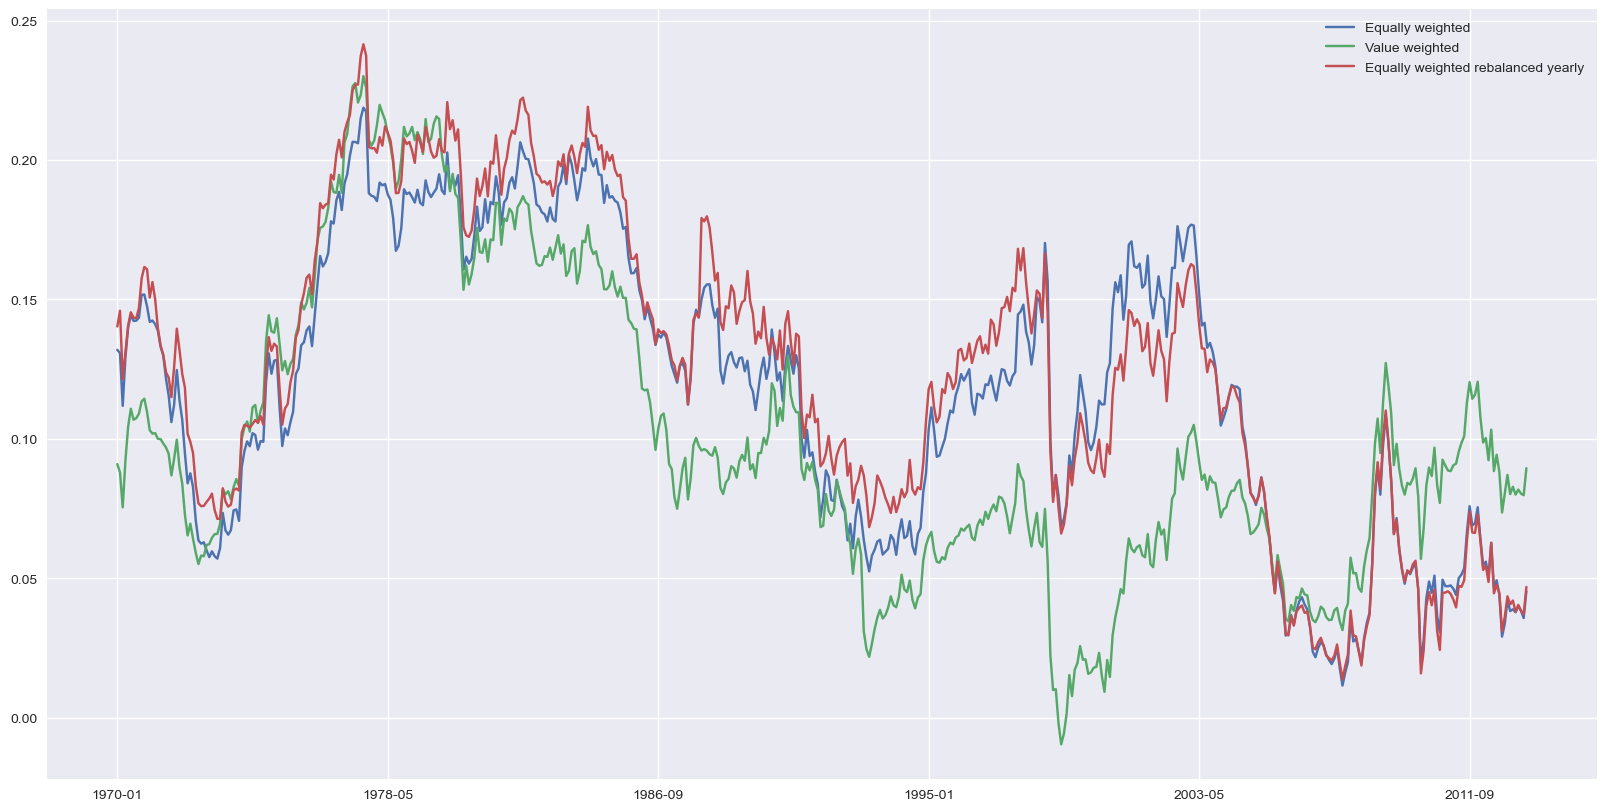

In [18]:
results.plot(figsize=(20,10))

# Azionario

In [19]:
SeP500=[["Apple Inc.","AAPL",5.972092],["Microsoft Corporation","MSFT",5.195264],["Amazon.com Inc.","AMZN",2.379241],["Berkshire Hathaway Inc. Class B","BRK-B",1.744472],["Alphabet Inc. Class A","GOOGL",1.613283],["Alphabet Inc. Class C","GOOG",1.442776],["Johnson & Johnson","JNJ",1.410177],["UnitedHealth Group Incorporated","UNH",1.405054],["Exxon Mobil Corporation","XOM",1.37076],["JPMorgan Chase & Co.","JPM",1.236438],["NVIDIA Corporation","NVDA",1.195415],["Procter & Gamble Company","PG",1.105573],["Visa Inc. Class A","V",1.096749],["Home Depot Inc.","HD",0.997795],["Tesla Inc","TSLA",0.986464],["Mastercard Incorporated Class A","MA",0.966856],["Chevron Corporation","CVX",0.956271],["Meta Platforms Inc. Class A","META",0.89337],["AbbVie Inc.","ABBV",0.877282],["Merck & Co. Inc.","MRK",0.858758],["Eli Lilly and Company","LLY",0.846603],["Pfizer Inc.","PFE",0.833512],["PepsiCo Inc.","PEP",0.758131],["Coca-Cola Company","KO",0.747755],["Bank of America Corp","BAC",0.725827],["Broadcom Inc.","AVGO",0.716962],["Thermo Fisher Scientific Inc.","TMO",0.657217],["Costco Wholesale Corporation","COST",0.650236],["Walmart Inc.","WMT",0.627775],["Cisco Systems Inc.","CSCO",0.612083],["McDonald's Corporation","MCD",0.600491],["Abbott Laboratories","ABT",0.59982],["Verizon Communications Inc.","VZ",0.533153],["Walt Disney Company","DIS",0.530158],["Accenture Plc Class A","ACN",0.528608],["Danaher Corporation","DHR",0.512754],["NextEra Energy Inc.","NEE",0.512642],["Comcast Corporation Class A","CMCSA",0.497075],["Wells Fargo & Company","WFC",0.495657],["Texas Instruments Incorporated","TXN",0.493682],["Adobe Incorporated","ADBE",0.489401],["Linde plc","LIN",0.48837],["Philip Morris International Inc.","PM",0.486636],["NIKE Inc. Class B","NKE",0.482411],["Bristol-Myers Squibb Company","BMY",0.463078],["Salesforce Inc.","CRM",0.451387],["Raytheon Technologies Corporation","RTX",0.44971],["ConocoPhillips","COP",0.448749],["Amgen Inc.","AMGN",0.441853],["Honeywell International Inc.","HON",0.433987],["Netflix Inc.","NFLX",0.430386],["AT&T Inc.","T",0.416399],["Oracle Corporation","ORCL",0.407548],["United Parcel Service Inc. Class B","UPS",0.406095],["Union Pacific Corporation","UNP",0.39893],["Charles Schwab Corp","SCHW",0.398872],["International Business Machines Corporation","IBM",0.398262],["Caterpillar Inc.","CAT",0.393825],["QUALCOMM Incorporated","QCOM",0.393572],["Lowe's Companies Inc.","LOW",0.379872],["Intel Corporation","INTC",0.371181],["Starbucks Corporation","SBUX",0.368938],["CVS Health Corporation","CVS",0.368887],["Goldman Sachs Group Inc.","GS",0.368308],["Deere & Company","DE",0.360904],["Boeing Company","BA",0.358554],["S&P Global Inc.","SPGI",0.357988],["Morgan Stanley","MS",0.354531],["BlackRock Inc.","BLK",0.347126],["Elevance Health Inc.","ELV",0.345529],["Intuit Inc.","INTU",0.341941],["Advanced Micro Devices Inc.","AMD",0.332127],["Prologis Inc.","PLD",0.328743],["Lockheed Martin Corporation","LMT",0.328513],["Gilead Sciences Inc.","GILD",0.327529],["Medtronic Plc","MDT",0.316254],["American Tower Corporation","AMT",0.313324],["Automatic Data Processing Inc.","ADP",0.304246],["TJX Companies Inc","TJX",0.291838],["Intuitive Surgical Inc.","ISRG",0.289022],["Chubb Limited","CB",0.285456],["Cigna Corporation","CI",0.284308],["Citigroup Inc.","C",0.282546],["Mondelez International Inc. Class A","MDLZ",0.281817],["Applied Materials Inc.","AMAT",0.281125],["American Express Company","AXP",0.275858],["T-Mobile US Inc.","TMUS",0.273871],["PayPal Holdings Inc.","PYPL",0.269647],["Stryker Corporation","SYK",0.268699],["Analog Devices Inc.","ADI",0.26569],["Booking Holdings Inc.","BKNG",0.262864],["Marsh & McLennan Companies Inc.","MMC",0.259978],["Altria Group Inc","MO",0.253216],["Duke Energy Corporation","DUK",0.248565],["General Electric Company","GE",0.242898],["Schlumberger NV","SLB",0.242102],["Southern Company","SO",0.238857],["Progressive Corporation","PGR",0.237003],["ServiceNow Inc.","NOW",0.233859],["EOG Resources Inc.","EOG",0.23026],["Vertex Pharmaceuticals Incorporated","VRTX",0.223092],["Regeneron Pharmaceuticals Inc.","REGN",0.222935],["Target Corporation","TGT",0.221715],["Becton Dickinson and Company","BDX",0.220153],["Northrop Grumman Corp.","NOC",0.220079],["3M Company","MMM",0.215052],["Air Products and Chemicals Inc.","APD",0.212123],["Zoetis Inc. Class A","ZTS",0.210301],["CSX Corporation","CSX",0.207347],["PNC Financial Services Group Inc.","PNC",0.203314],["Colgate-Palmolive Company","CL",0.201143],["Boston Scientific Corporation","BSX",0.200375],["Fiserv Inc.","FISV",0.199639],["Eaton Corp. Plc","ETN",0.19594],["Illinois Tool Works Inc.","ITW",0.195523],["Aon Plc Class A","AON",0.194443],["CME Group Inc. Class A","CME",0.194055],["Equinix Inc.","EQIX",0.193415],["Crown Castle Inc.","CCI",0.193182],["U.S. Bancorp","USB",0.192707],["Lam Research Corporation","LRCX",0.18949],["Micron Technology Inc.","MU",0.18802],["Freeport-McMoRan Inc.","FCX",0.187285],["Humana Inc.","HUM",0.187147],["Moderna Inc.","MRNA",0.186492],["Truist Financial Corporation","TFC",0.186463],["Estee Lauder Companies Inc. Class A","EL",0.184866],["Waste Management Inc.","WM",0.182023],["Norfolk Southern Corporation","NSC",0.180603],["Intercontinental Exchange Inc.","ICE",0.179529],["KLA Corporation","KLAC",0.177062],["Emerson Electric Co.","EMR",0.176096],["Sherwin-Williams Company","SHW",0.170231],["General Dynamics Corporation","GD",0.1686],["Activision Blizzard Inc.","ATVI",0.168098],["Pioneer Natural Resources Company","PXD",0.167961],["McKesson Corporation","MCK",0.167932],["Dollar General Corporation","DG",0.167117],["Marathon Petroleum Corporation","MPC",0.166475],["HCA Healthcare Inc","HCA",0.164483],["O'Reilly Automotive Inc.","ORLY",0.159142],["Dominion Energy Inc","D",0.156789],["General Motors Company","GM",0.156594],
        ["American Electric Power Company Inc.","AEP",0.154449],["General Mills Inc.","GIS",0.15429],["Ford Motor Company","F",0.15325],["Valero Energy Corporation","VLO",0.152112],["Synopsys Inc.","SNPS",0.152103],["Sempra Energy","SRE",0.151562],["Phillips 66","PSX",0.149645],["MetLife Inc.","MET",0.146185],["American International Group Inc.","AIG",0.145617],["Edwards Lifesciences Corporation","EW",0.144928],["Amphenol Corporation Class A","APH",0.14448],["Roper Technologies Inc.","ROP",0.144299],["Archer-Daniels-Midland Company","ADM",0.143905],["Occidental Petroleum Corporation","OXY",0.142978],["AutoZone Inc.","AZO",0.142244],["Kimberly-Clark Corporation","KMB",0.141455],["Johnson Controls International plc","JCI",0.140653],["Moody's Corporation","MCO",0.140293],["FedEx Corporation","FDX",0.139394],["Cadence Design Systems Inc.","CDNS",0.13905],["Travelers Companies Inc.","TRV",0.137296],["Public Storage","PSA",0.135879],["Centene Corporation","CNC",0.135632],["Agilent Technologies Inc.","A",0.134541],["Corteva Inc","CTVA",0.134153],["Exelon Corporation","EXC",0.13388],["Motorola Solutions Inc.","MSI",0.132857],["DexCom Inc.","DXCM",0.131727],["NXP Semiconductors NV","NXPI",0.129153],["Autodesk Inc.","ADSK",0.127722],["Fidelity National Information Services Inc.","FIS",0.127459],["Ross Stores Inc.","ROST",0.126913],["Newmont Corporation","NEM",0.126425],["Trane Technologies plc","TT",0.126398],["Marriott International Inc. Class A","MAR",0.125934],["Aflac Incorporated","AFL",0.125663],["Devon Energy Corporation","DVN",0.124544],["Realty Income Corporation","O",0.124514],["Microchip Technology Incorporated","MCHP",0.124273],["Sysco Corporation","SYY",0.123393],["Arthur J. Gallagher & Co.","AJG",0.123355],["Chipotle Mexican Grill Inc.","CMG",0.122733],["Hess Corporation","HES",0.121821],["Biogen Inc.","BIIB",0.121754],["Williams Companies Inc.","WMB",0.121581],["Dow Inc.","DOW",0.121419],["Charter Communications Inc. Class A","CHTR",0.121023],["Parker-Hannifin Corporation","PH",0.121015],["Xcel Energy Inc.","XEL",0.120873],["Monster Beverage Corporation","MNST",0.118979],["IQVIA Holdings Inc","IQV",0.118883],["TE Connectivity Ltd.","TEL",0.118738],["MSCI Inc. Class A","MSCI",0.118715],["Simon Property Group Inc.","SPG",0.117793],["L3Harris Technologies Inc","LHX",0.117546],["Cintas Corporation","CTAS",0.116073],["Allstate Corporation","ALL",0.115739],["Paychex Inc.","PAYX",0.115561],["Capital One Financial Corp","COF",0.114384],["IDEXX Laboratories Inc.","IDXX",0.114092],["Kinder Morgan Inc Class P","KMI",0.11343],["Ecolab Inc.","ECL",0.113259],["Nucor Corporation","NUE",0.112968],["Yum! Brands Inc.","YUM",0.112868],["Halliburton Company","HAL",0.112683],["DuPont de Nemours Inc.","DD",0.11256],["Carrier Global Corp.","CARR",0.111964],["Prudential Financial Inc.","PRU",0.111664],["Bank of New York Mellon Corp","BK",0.108264],["Hilton Worldwide Holdings Inc","HLT",0.108158],["Constellation Brands Inc. Class A","STZ",0.107346],["PACCAR Inc","PCAR",0.106491],["Consolidated Edison Inc.","ED",0.106409],["Ameriprise Financial Inc.","AMP",0.106264],["Cummins Inc.","CMI",0.105227],["Otis Worldwide Corporation","OTIS",0.104566],["Kraft Heinz Company","KHC",0.102786],["TransDigm Group Incorporated","TDG",0.102601],["Hershey Company","HSY",0.101227],["Welltower Inc","WELL",0.10044],["Electronic Arts Inc.","EA",0.100289],["Mettler-Toledo International Inc.","MTD",0.100162],["Illumina Inc.","ILMN",0.100063],["AMETEK Inc.","AME",0.099793],["Fortinet Inc.","FTNT",0.098895],["Public Service Enterprise Group Inc","PEG",0.097223],["Keysight Technologies Inc","KEYS",0.097182],["Cognizant Technology Solutions Corporation Class A","CTSH",0.096263],["CoStar Group Inc.","CSGP",0.096193],["SBA Communications Corp. Class A","SBAC",0.096004],["Rockwell Automation Inc.","ROK",0.09463],["Baker Hughes Company Class A","BKR",0.094491],["Enphase Energy Inc.","ENPH",0.094397],["ResMed Inc.","RMD",0.094257],["VICI Properties Inc","VICI",0.093879],["Keurig Dr Pepper Inc.","KDP",0.093603],["WEC Energy Group Inc","WEC",0.093462],["Dollar Tree Inc.","DLTR",0.092927],["ONEOK Inc.","OKE",0.092837],["PPG Industries Inc.","PPG",0.092623],
        ["Kroger Co.","KR",0.092355],["State Street Corporation","STT",0.091104],["Eversource Energy","ES",0.090788],["Global Payments Inc.","GPN",0.090246],["D.R. Horton Inc.","DHI",0.089688],["Digital Realty Trust Inc.","DLR",0.08888],["American Water Works Company Inc.","AWK",0.088404],["Verisk Analytics Inc","VRSK",0.087383],["International Flavors & Fragrances Inc.","IFF",0.087129],["Discover Financial Services","DFS",0.086772],["Arista Networks Inc.","ANET",0.086568],["Old Dominion Freight Line Inc.","ODFL",0.085819],["Willis Towers Watson Public Limited Company","WTW",0.085698],["ON Semiconductor Corporation","ON",0.085633],["Constellation Energy Corporation","CEG",0.084289],["Fastenal Company","FAST",0.08349],["Copart Inc.","CPRT",0.082106],["Corning Inc","GLW",0.082084],["AmerisourceBergen Corporation","ABC",0.081986],["Aptiv PLC","APTV",0.081465],["Zimmer Biomet Holdings Inc.","ZBH",0.081167],["Albemarle Corporation","ALB",0.08052],["United Rentals Inc.","URI",0.080435],["CBRE Group Inc. Class A","CBRE",0.08027],["Republic Services Inc.","RSG",0.080228],["Walgreens Boots Alliance Inc.","WBA",0.080065],["M&T Bank Corporation","MTB",0.0798],["HP Inc.","HPQ",0.079725],["Gartner Inc.","IT",0.079622],["Edison International","EIX",0.079437],["T. Rowe Price Group","TROW",0.079182],["PG&E Corporation","PCG",0.07885],["Warner Bros. Discovery Inc. Series A","WBD",0.0779],["Ulta Beauty Inc.","ULTA",0.077217],["W.W. Grainger Inc.","GWW",0.077215],["Diamondback Energy Inc.","FANG",0.076901],["Equifax Inc.","EFX",0.076884],["Hartford Financial Services Group Inc.","HIG",0.075952],["CDW Corp.","CDW",0.075722],["Lennar Corporation Class A","LEN",0.07431],["Genuine Parts Company","GPC",0.07393],["Tractor Supply Company","TSCO",0.073814],["eBay Inc.","EBAY",0.073125],["Vulcan Materials Company","VMC",0.072605],["Fifth Third Bancorp","FITB",0.072077],["Fortive Corp.","FTV",0.071437],["Weyerhaeuser Company","WY",0.071345],["Delta Air Lines Inc.","DAL",0.071286],["Arch Capital Group Ltd.","ACGL",0.07113],["LyondellBasell Industries NV","LYB",0.071072],["Ameren Corporation","AEE",0.070927],["DTE Energy Company","DTE",0.070729],["FirstEnergy Corp.","FE",0.070382],["AvalonBay Communities Inc.","AVB",0.06975],["Baxter International Inc.","BAX",0.068614],["Ingersoll Rand Inc.","IR",0.068446],["PPL Corporation","PPL",0.067845],["Laboratory Corporation of America Holdings","LH",0.067336],["Entergy Corporation","ETR",0.067229],["Hewlett Packard Enterprise Co.","HPE",0.067117],["Alexandria Real Estate Equities Inc.","ARE",0.066364],["Raymond James Financial Inc.","RJF",0.065583],["ANSYS Inc.","ANSS",0.065464],["Martin Marietta Materials Inc.","MLM",0.065241],["McCormick & Company Incorporated","MKC",0.065064],["Nasdaq Inc.","NDAQ",0.064904],["Southwest Airlines Co.","LUV",0.064881],["GE Healthcare Technologies Inc.","GEHC",0.064733],["Regions Financial Corporation","RF",0.063589],["Huntington Bancshares Incorporated","HBAN",0.06324],["Cardinal Health Inc.","CAH",0.062395],["Citizens Financial Group Inc.","CFG",0.061825],["Principal Financial Group Inc.","PFG",0.061525],["Hologic Inc.","HOLX",0.06115],["Xylem Inc.","XYL",0.061036],["Church & Dwight Co. Inc.","CHD",0.060911],["Dover Corporation","DOV",0.060577],["Equity Residential","EQR",0.060478],["Coterra Energy Inc.","CTRA",0.060251],["Quanta Services Inc.","PWR",0.060078],["Extra Space Storage Inc.","EXR",0.059711],["Northern Trust Corporation","NTRS",0.059481],["VeriSign Inc.","VRSN",0.059426],["Conagra Brands Inc.","CAG",0.058812],["Tyson Foods Inc. Class A","TSN",0.058676],["Waters Corporation","WAT",0.058632],["CenterPoint Energy Inc.","CNP",0.058168],["STERIS Plc","STE",0.058101],["Ventas Inc.","VTR",0.057926],["Teledyne Technologies Incorporated","TDY",0.057838],["CMS Energy Corporation","CMS",0.057217],["EPAM Systems Inc.","EPAM",0.057009],["Westinghouse Air Brake Technologies Corporation","WAB",0.056127],["Amcor PLC","AMCR",0.05611],["Kellogg Company","K",0.056065],["Darden Restaurants Inc.","DRI",0.055523],["AES Corporation","AES",0.055017],["Expeditors International of Washington Inc.","EXPD",0.054957],["Quest Diagnostics Incorporated","DGX",0.054485],["Mid-America Apartment Communities Inc.","MAA",0.054357],["West Pharmaceutical Services Inc.","WST",0.053932],["IDEX Corporation","IEX",0.053837],["Omnicom Group Inc","OMC",0.053631],["Ball Corporation","BALL",0.053405],["Clorox Company","CLX",0.053085],["Las Vegas Sands Corp.","LVS",0.053033],["Cincinnati Financial Corporation","CINF",0.052906],["Invitation Homes Inc.","INVH",0.052831],["Molina Healthcare Inc.","MOH",0.052715],["Marathon Oil Corporation","MRO",0.052674],["J.M. Smucker Company","SJM",0.052602],["CF Industries Holdings Inc.","CF",0.052406],["Monolithic Power Systems Inc.","MPWR",0.052078],["Targa Resources Corp.","TRGP",0.051752],["Steel Dynamics Inc.","STLD",0.051639],["KeyCorp","KEY",0.051373],["Cooper Companies Inc.","COO",0.051345],["Align Technology Inc.","ALGN",0.050664],["Best Buy Co. Inc.","BBY",0.050637],["Take-Two Interactive Software Inc.","TTWO",0.050468],["Broadridge Financial Solutions Inc.","BR",0.050063],["Mosaic Company","MOS",0.049843],["FMC Corporation","FMC",0.049682],["Jacobs Solutions Inc.","J",0.04961],["First Solar Inc.","FSLR",0.048424],["Atmos Energy Corporation","ATO",0.048239],["SolarEdge Technologies Inc.","SEDG",0.04798],["Avery Dennison Corporation","AVY",0.047566],["Skyworks Solutions Inc.","SWKS",0.047287],["Etsy Inc.","ETSY",0.046548],["FactSet Research Systems Inc.","FDS",0.046409],["Garmin Ltd.","GRMN",0.046339],["Textron Inc.","TXT",0.045601],["W. R. Berkley Corporation","WRB",0.045534],["Howmet Aerospace Inc.","HWM",0.045264],["J.B. Hunt Transport Services Inc.","JBHT",0.045239],["NVR Inc.","NVR",0.044976],
        ["Incyte Corporation","INCY",0.04491],["Teradyne Inc.","TER",0.044697],["Synchrony Financial","SYF",0.044642],["Evergy Inc.","EVRG",0.044557],["Iron Mountain Inc.","IRM",0.044413],["LKQ Corporation","LKQ",0.044299],["Zebra Technologies Corporation Class A","ZBRA",0.04422],["Viatris Inc.","VTRS",0.04399],["FLEETCOR Technologies Inc.","FLT",0.043725],["Paycom Software Inc.","PAYC",0.043642],["United Airlines Holdings Inc.","UAL",0.043487],["Lamb Weston Holdings Inc.","LW",0.043345],["NetApp Inc.","NTAP",0.043318],["APA Corp.","APA",0.043298],["Healthpeak Properties Inc.","PEAK",0.042893],["Expedia Group Inc.","EXPE",0.042841],["Everest Re Group Ltd.","RE",0.042568],["Interpublic Group of Companies Inc.","IPG",0.042389],["Akamai Technologies Inc.","AKAM",0.04219],["Alliant Energy Corp","LNT",0.042032],["Essex Property Trust Inc.","ESS",0.041888],["Leidos Holdings Inc.","LDOS",0.041849],["Brown & Brown Inc.","BRO",0.041666],["International Paper Company","IP",0.040931],["Hormel Foods Corporation","HRL",0.040784],["Tyler Technologies Inc.","TYL",0.040759],["PTC Inc.","PTC",0.040425],["Jack Henry & Associates Inc.","JKHY",0.039837],["Trimble Inc.","TRMB",0.039799],["Nordson Corporation","NDSN",0.039797],["Bio-Techne Corporation","TECH",0.039564],["Kimco Realty Corporation","KIM",0.039545],["Cboe Global Markets Inc","CBOE",0.039469],["Snap-on Incorporated","SNA",0.039297],["EQT Corporation","EQT",0.038698],["Pool Corporation","POOL",0.038572],["Royal Caribbean Group","RCL",0.038376],["Packaging Corporation of America","PKG",0.038135],["Gen Digital Inc.","GEN",0.037863],["Match Group Inc.","MTCH",0.037692],["MGM Resorts International","MGM",0.03756],["Stanley Black & Decker Inc.","SWK",0.037092],["MarketAxess Holdings Inc.","MKTX",0.03671],["Camden Property Trust","CPT",0.036697],["Domino's Pizza Inc.","DPZ",0.036614],["Teleflex Incorporated","TFX",0.03642],["UDR Inc.","UDR",0.036124],["Brown-Forman Corporation Class B","BF-B",0.035797],["Western Digital Corporation","WDC",0.035754],["Celanese Corporation","CE",0.035601],["C.H. Robinson Worldwide Inc.","CHRW",0.035378],["Loews Corporation","L",0.03518],["Host Hotels & Resorts Inc.","HST",0.034877],["Masco Corporation","MAS",0.034733],["Charles River Laboratories International Inc.","CRL",0.034667],["Campbell Soup Company","CPB",0.034633],["NiSource Inc","NI",0.034486],["Henry Schein Inc.","HSIC",0.034064],["PulteGroup Inc.","PHM",0.034039],["Globe Life Inc.","GL",0.033289],["Eastman Chemical Company","EMN",0.033266],["CarMax Inc.","KMX",0.033087],["Seagate Technology Holdings PLC","STX",0.033013],["Tapestry Inc.","TPR",0.031763],["Live Nation Entertainment Inc.","LYV",0.03139],["Bath & Body Works Inc.","BBWI",0.031379],["Juniper Networks Inc.","JNPR",0.031345],["BorgWarner Inc.","BWA",0.030795],["Allegion Public Limited Company","ALLE",0.0305],["Universal Health Services Inc. Class B","UHS",0.030292],["Wynn Resorts Limited","WYNN",0.030269],["Paramount Global Class B","PARA",0.030186],["Qorvo Inc.","QRVO",0.030059],["Ceridian HCM Holding Inc.","CDAY",0.029434],["Fox Corporation Class A","FOXA",0.029317],["V.F. Corporation","VFC",0.029],["Regency Centers Corporation","REG",0.028952],["Molson Coors Beverage Company Class B","TAP",0.028838],["American Airlines Group Inc.","AAL",0.028624],["WestRock Company","WRK",0.028472],["Boston Properties Inc.","BXP",0.028276],["Caesars Entertainment Inc","CZR",0.028275],["Advance Auto Parts Inc.","AAP",0.028202],["Carnival Corporation","CCL",0.028164],["Bio-Rad Laboratories Inc. Class A","BIO",0.027751],["Huntington Ingalls Industries Inc.","HII",0.026944],["Comerica Incorporated","CMA",0.026891],["Invesco Ltd.","IVZ",0.026802],["Catalent Inc","CTLT",0.026233],["F5 Inc.","FFIV",0.026084],["Pinnacle West Capital Corporation","PNW",0.025971],["Rollins Inc.","ROL",0.025945],["Robert Half International Inc.","RHI",0.025398],["Whirlpool Corporation","WHR",0.025367],["Hasbro Inc.","HAS",0.024835],["A. O. Smith Corporation","AOS",0.024133],["Sealed Air Corporation","SEE",0.023985],["Pentair plc","PNR",0.023847],["Franklin Resources Inc.","BEN",0.02376],
        ["Zions Bancorporation N.A.","ZION",0.023517],["NRG Energy Inc.","NRG",0.023479],["Federal Realty Investment Trust","FRT",0.023081],["Organon & Co.","OGN",0.022834],["News Corporation Class A","NWSA",0.022747],["DENTSPLY SIRONA Inc.","XRAY",0.021835],["Assurant Inc.","AIZ",0.020374],["Generac Holdings Inc.","GNRC",0.020031],["DXC Technology Co.","DXC",0.019866],["Mohawk Industries Inc.","MHK",0.01762],["Norwegian Cruise Line Holdings Ltd.","NCLH",0.017473],["Alaska Air Group Inc.","ALK",0.017329],["Newell Brands Inc","NWL",0.01676],["Lumen Technologies Inc.","LUMN",0.015085],["Ralph Lauren Corporation Class A","RL",0.015011],["Lincoln National Corp","LNC",0.01452],["DaVita Inc.","DVA",0.013406],["Fox Corporation Class B","FOX",0.01319],["DISH Network Corporation Class A","DISH",0.011947],["News Corporation Class B","NWS",0.007208]]
# ATTENZIONE!!! RIMOSSE TRE BANCHE che sono fallite! e anche un'altra cosa sparita
tickers=list(np.array(SeP500)[:,1])
dati=yf.download(tickers, interval='1mo')["Adj Close"]
dati=dati.reindex(tickers, axis=1) # rimetto a posto le colonne che non ho capito perché me le scombina

[*********************100%***********************]  499 of 499 completed


In [20]:
dati.fillna(method="ffill",limit=6,inplace=True)

In [21]:
etf=tickers
percentage=list(map(float, list(np.array(SeP500)[:,2])))

In [22]:
dati2=dati[etf].dropna(how="all",axis=0).copy()

In [23]:
dati2

AAPL        MSFT        AMZN       BRK-B       GOOGL  \
Date                                                                     
1962-02-01         NaN         NaN         NaN         NaN         NaN   
1962-03-01         NaN         NaN         NaN         NaN         NaN   
1962-04-01         NaN         NaN         NaN         NaN         NaN   
1962-05-01         NaN         NaN         NaN         NaN         NaN   
1962-06-01         NaN         NaN         NaN         NaN         NaN   
...                ...         ...         ...         ...         ...   
2023-03-01  164.672226  287.671112  103.290001  308.769989  103.730003   
2023-04-01  169.445618  306.589783  105.449997  328.549988  107.339996   
2023-05-01  177.005173  327.673706  120.580002  321.079987  122.870003   
2023-06-01  193.970001  340.540009  130.360001  341.000000  119.699997   
2023-07-01  195.660004  336.149994  130.839996  350.274994  132.485001   

                  GOOG         JNJ         UNH         XOM         JPM  ...  \
Date                                                                    ...   
1962-02-01         NaN         NaN         NaN         NaN         NaN  ...   
1962-03-01         NaN         NaN         NaN         NaN         NaN  ...   
1962-04-01         NaN         NaN         NaN         NaN         NaN  ...   
1962-05-01         NaN         NaN         NaN         NaN         NaN  ...   
1962-06-01         NaN         NaN         NaN         NaN         NaN  ...   
...                ...         ...         ...         ...         ...  ...   
2023-03-01  104.000000  153.839279  468.987518  108.716629  128.413376  ...   
2023-04-01  108.220001  162.474136  490.078217  117.321945  136.227982  ...   
2023-05-01  123.370003  153.898834  485.248047  101.300972  134.784363  ...   
2023-06-01  120.970001  165.520004  478.675049  107.250000  144.447983  ...   
2023-07-01  132.869995  174.119995  498.429993  103.889999  157.024994  ...   

                 NCLH        ALK        NWL  LUMN          RL        LNC  \
Date                                                                       
1962-02-01        NaN        NaN        NaN   NaN         NaN        NaN   
1962-03-01        NaN        NaN        NaN   NaN         NaN        NaN   
1962-04-01        NaN        NaN        NaN   NaN         NaN        NaN   
1962-05-01        NaN        NaN        NaN   NaN         NaN        NaN   
1962-06-01        NaN        NaN        NaN   NaN         NaN        NaN   
...               ...        ...        ...   ...         ...        ...   
2023-03-01  13.450000  41.959999  12.340252  2.65  115.207405  21.603630   
2023-04-01  13.350000  43.459999  12.052577  2.37  114.084671  20.892162   
2023-05-01  14.850000  44.930000   8.243368  1.98  105.656776  20.552553   
2023-06-01  21.770000  53.180000   8.700000  2.26  122.542381  25.307541   
2023-07-01  21.639999  48.051300  10.795000  1.82  128.259995  27.879999   

                   DVA        FOX   DISH        NWS  
Date                                                 
1962-02-01         NaN        NaN    NaN        NaN  
1962-03-01         NaN        NaN    NaN        NaN  
1962-04-01         NaN        NaN    NaN        NaN  
1962-05-01         NaN        NaN    NaN        NaN  
1962-06-01         NaN        NaN    NaN        NaN  
...                ...        ...    ...        ...  
2023-03-01   81.110001  31.309999  9.330  17.319405  
2023-04-01   90.360001  30.540001  7.510  17.750000  
2023-05-01   93.669998  29.209999  6.430  18.480000  
2023-06-01  100.470001  31.889999  6.590  19.719999  
2023-07-01   99.805000  31.209999  7.595  19.700001  

[738 rows x 499 columns]

In [24]:
ricalcolo_pesi=True
N=10
results=pd.DataFrame()
tf=dati2.iloc[-1]
for i1 in range(len(dati2.index)-12*N):
    i2=i1+12*N
    t1=dati2.iloc[i1].dropna()
    t2=dati2.iloc[i2].dropna()
    validi=[x for x in t1.index if x in t2.index]
    results.loc[dati2.index[i1],"Equally weighted"]=(sum(t2[validi]/t1[validi])/len(validi))**(1/N)-1 # banale media semplice
    pesi=[percentage[k] for k in [j for (j, item) in enumerate(etf) if item in validi]]
    pesi_ritracciati=list(pesi)
    if ricalcolo_pesi:
        pesi_ritracciati=list(pesi*t1[validi]/tf[validi])
    #    pesi_ritracciati = np.sqrt( np.array( pesi_ritracciati ) ) # pesi sotto radice quadrata
    #    pesi_ritracciati=1/np.array(pesi_ritracciati) # pesi ROVESCIATI
    pesi_ritracciati=np.array(pesi_ritracciati)/sum(pesi_ritracciati) 
    # print(validi,pesi_ritracciati)
    results.loc[dati2.index[i1],"Value weighted"]=(np.dot(t2[validi]/t1[validi],pesi_ritracciati))**(1/N)-1 # media pesata
    # facciamo equally weighted ribilanciato annualmente
    valore=100
    assegnazione=valore/len(validi)
    quantita=assegnazione/t1
    salto=False
    for i in range(i1,i2+1,12):
        if len(quantita)==len(dati2[validi].iloc[i].dropna()):
            valore=np.dot(quantita,dati2[validi].iloc[i].dropna())
            assegnazione=valore/len(validi)
            quantita=assegnazione/dati2[validi].iloc[i].dropna()
        else:
            salto=True
            break
    if not salto:
        results.loc[dati2.index[i1],"Equally weighted rebalanced yearly"]=(valore/100)**(1/N)-1
    # facciamo equally weighted ribilanciato mensilmente
#     valore=100
#     assegnazione=valore/len(validi)
#     quantita=assegnazione/t1
#     salto=False
#     for i in range(i1,i2+1,1):
#         if len(quantita)==len(dati2[validi].iloc[i].dropna()):
#             valore=np.dot(quantita,dati2[validi].iloc[i].dropna())
#             assegnazione=valore/len(validi)
#             quantita=assegnazione/dati2[validi].iloc[i].dropna()
#         else:
#             salto=True
#             break
#     if not salto:
#         results.loc[dati2.index[i1],"Equally weighted rebalanced monthly"]=(valore/100)**(1/N)-1



In [25]:
results

Equally weighted  Value weighted  \
1962-02-01          0.075838        0.089979   
1962-03-01          0.080640        0.094690   
1962-04-01          0.099002        0.112850   
1962-05-01          0.112662        0.128125   
1962-06-01          0.123600        0.140303   
...                      ...             ...   
2013-03-01          0.159467        0.125551   
2013-04-01          0.154837        0.124670   
2013-05-01          0.150120        0.121209   
2013-06-01          0.159852        0.129021   
2013-07-01          0.157510        0.126712   

            Equally weighted rebalanced yearly  
1962-02-01                            0.081795  
1962-03-01                            0.086821  
1962-04-01                            0.104025  
1962-05-01                            0.118642  
1962-06-01                            0.126531  
...                                        ...  
2013-03-01                            0.155120  
2013-04-01                            0.150068  
2013-05-01                            0.146075  
2013-06-01                            0.155879  
2013-07-01                            0.153793  

[618 rows x 3 columns]

In [26]:
results.describe()

Equally weighted  Value weighted  Equally weighted rebalanced yearly
count        618.000000      618.000000                          618.000000
mean           0.146141        0.105425                            0.150984
std            0.057084        0.055967                            0.053905
min            0.025067       -0.026586                            0.035746
25%            0.111321        0.060446                            0.116080
50%            0.154203        0.119682                            0.158209
75%            0.181726        0.144766                            0.188584
max            0.317916        0.239704                            0.273679

<Axes: >

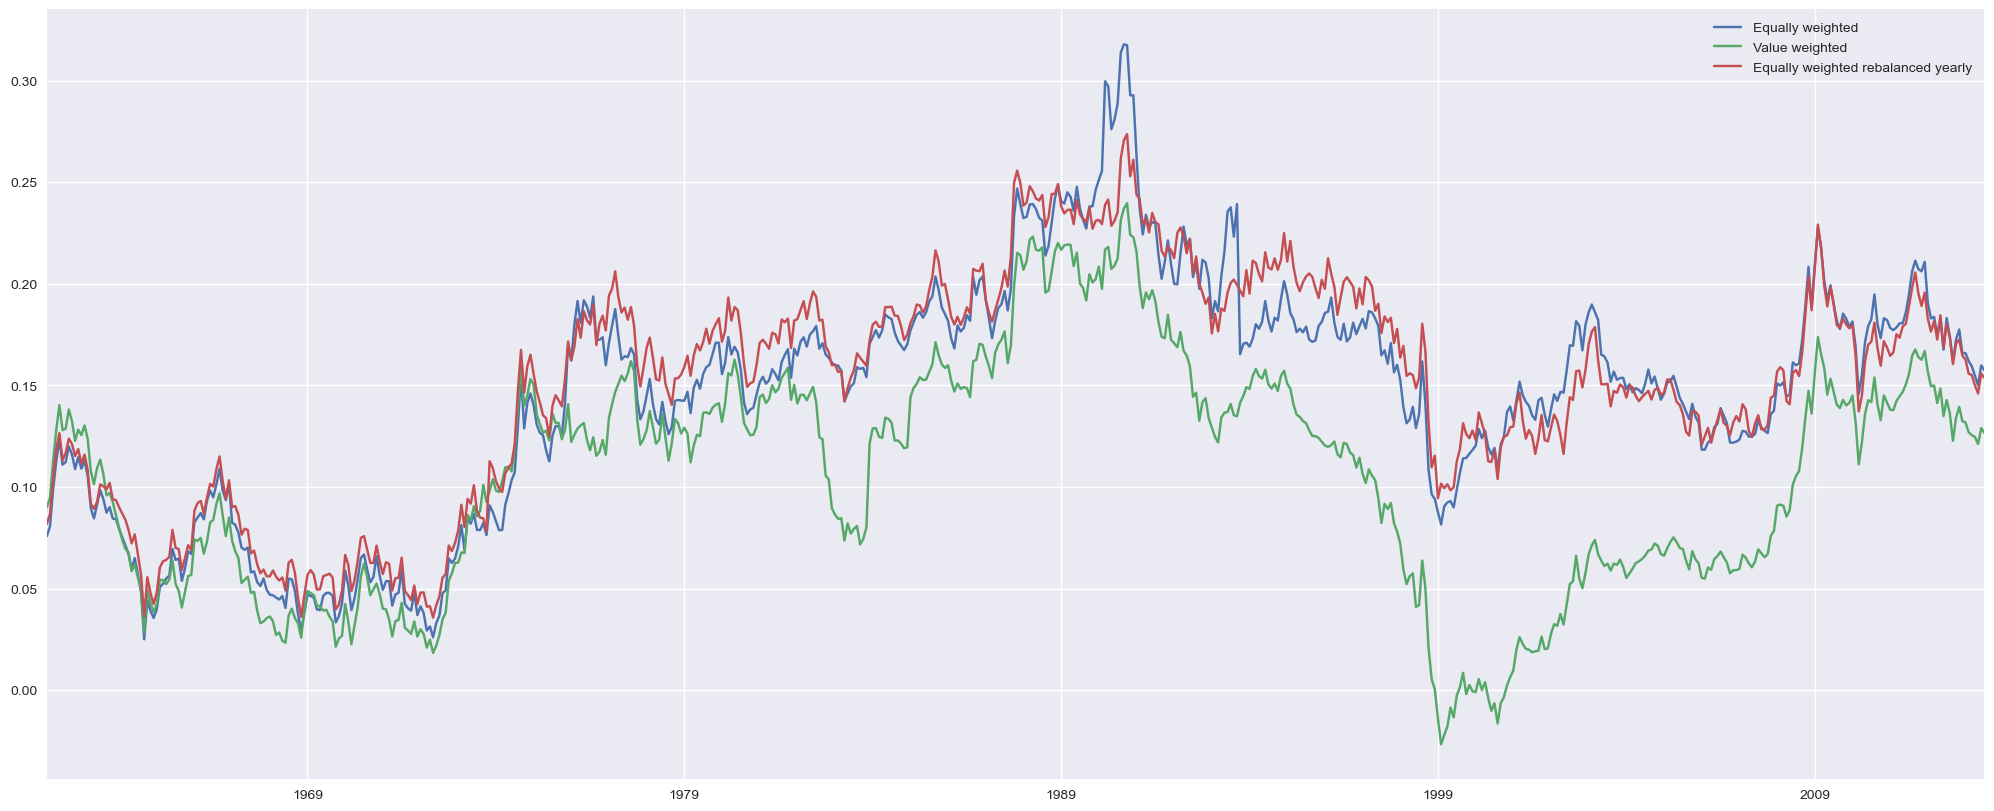

In [27]:
results.plot(figsize=(25,10))